In [130]:
import csv
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [131]:
x = []
y_binary = []
y_5_level = []
first = 0

with open('student-mat.csv', newline='') as csvfile:
  rows = csv.reader(csvfile, delimiter = ';')
  for row in rows:
    if first == 0:
        first = 1
        continue
    x.append(row[:-1])

    G3 = int(row[-1])
    if G3 >= 10:
        y_binary.append('PASS')
    else:
        y_binary.append('FAIL')
    
    if G3 >= 16:
        y_5_level.append('A')
    elif G3 >= 14:
        y_5_level.append('B')
    elif G3 >= 12:
        y_5_level.append('C')
    elif G3 >= 10:
        y_5_level.append('D')
    else:
        y_5_level.append('F')
#print(len(y_binary), len(y_5_level))
y_binary = np.array(y_binary)
y_5_level = np.array(y_5_level)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x)
x = enc.transform(x)



In [132]:
svd = TruncatedSVD(n_components=150, n_iter=10, random_state=777)

# PCA + Decision Tree

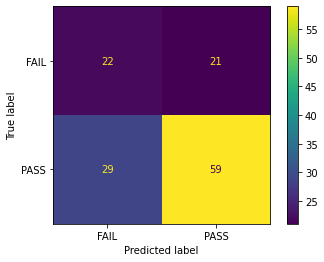

              precision    recall  f1-score   support

        FAIL       0.44      0.52      0.47       130
        PASS       0.74      0.67      0.70       265

    accuracy                           0.62       395
   macro avg       0.59      0.59      0.59       395
weighted avg       0.64      0.62      0.63       395



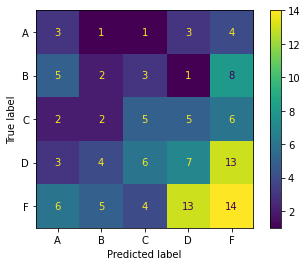

              precision    recall  f1-score   support

           A       0.18      0.28      0.22        40
           B       0.13      0.10      0.11        60
           C       0.25      0.24      0.25        62
           D       0.25      0.22      0.23       103
           F       0.31      0.32      0.32       130

    accuracy                           0.25       395
   macro avg       0.22      0.23      0.23       395
weighted avg       0.24      0.25      0.24       395



In [133]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
true_bin_class = []
true_5l_class = []
pred_bin_class = []
pred_5l_class = []

CMbinary_list = np.zeros((2,2)).astype(int)
CM5_level_list = np.zeros((5,5)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_binary_train, y_binary_test = y_binary[train_index], y_binary[test_index]
    y_5_level_train, y_5_level_test = y_5_level[train_index], y_5_level[test_index]

    svd.fit(X_train)

    X_train = svd.transform(X_train)
    X_test  = svd.transform(X_test)

    decision_tree_bin = tree.DecisionTreeClassifier()
    decision_tree_5l  = tree.DecisionTreeClassifier()

    decision_tree_bin = decision_tree_bin.fit(X_train, y_binary_train)
    decision_tree_5l  = decision_tree_5l.fit(X_train, y_5_level_train)

    y_binary_pred  = decision_tree_bin.predict(X_test)
    y_5_level_pred = decision_tree_5l.predict(X_test)

    true_bin_class.extend(y_binary_test)
    true_5l_class.extend(y_5_level_test)
    pred_bin_class.extend(y_binary_pred)
    pred_5l_class.extend(y_5_level_pred)

#binary 
CMbinary_list = confusion_matrix(true_bin_class, pred_bin_class) // 3
report = classification_report(true_bin_class, pred_bin_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=decision_tree_bin.classes_).plot()
plt.show()
print(report)

#5 level 
CMbinary_list = confusion_matrix(true_5l_class, pred_5l_class) // 3
report = classification_report(true_5l_class, pred_5l_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=decision_tree_5l.classes_).plot()
plt.show()
print(report)



# without PCA + Decision Tree

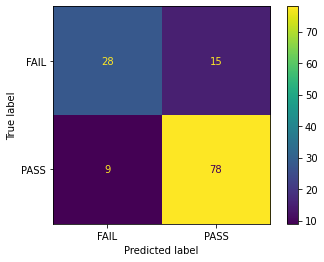

              precision    recall  f1-score   support

        FAIL       0.75      0.65      0.70       130
        PASS       0.84      0.89      0.86       265

    accuracy                           0.81       395
   macro avg       0.79      0.77      0.78       395
weighted avg       0.81      0.81      0.81       395



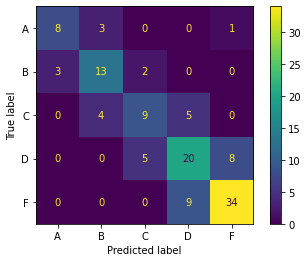

              precision    recall  f1-score   support

           A       0.70      0.65      0.68        40
           B       0.62      0.67      0.65        60
           C       0.55      0.47      0.50        62
           D       0.58      0.60      0.59       103
           F       0.77      0.79      0.78       130

    accuracy                           0.66       395
   macro avg       0.64      0.64      0.64       395
weighted avg       0.66      0.66      0.66       395



In [134]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
true_bin_class = []
true_5l_class = []
pred_bin_class = []
pred_5l_class = []

CMbinary_list = np.zeros((2,2)).astype(int)
CM5_level_list = np.zeros((5,5)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_binary_train, y_binary_test = y_binary[train_index], y_binary[test_index]
    y_5_level_train, y_5_level_test = y_5_level[train_index], y_5_level[test_index]

    decision_tree_bin = tree.DecisionTreeClassifier()
    decision_tree_5l  = tree.DecisionTreeClassifier()

    decision_tree_bin = decision_tree_bin.fit(X_train, y_binary_train)
    decision_tree_5l  = decision_tree_5l.fit(X_train, y_5_level_train)

    y_binary_pred  = decision_tree_bin.predict(X_test)
    y_5_level_pred = decision_tree_5l.predict(X_test)

    true_bin_class.extend(y_binary_test)
    true_5l_class.extend(y_5_level_test)
    pred_bin_class.extend(y_binary_pred)
    pred_5l_class.extend(y_5_level_pred)

#binary 
CMbinary_list = confusion_matrix(true_bin_class, pred_bin_class) // 3
report = classification_report(true_bin_class, pred_bin_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=decision_tree_bin.classes_).plot()
plt.show()
print(report)

#5 level 
CMbinary_list = confusion_matrix(true_5l_class, pred_5l_class) // 3
report = classification_report(true_5l_class, pred_5l_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=decision_tree_5l.classes_).plot()
plt.show()
print(report)



# PCA + Random Forest

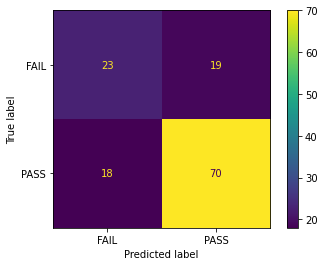

              precision    recall  f1-score   support

        FAIL       0.57      0.55      0.56       130
        PASS       0.78      0.80      0.79       265

    accuracy                           0.71       395
   macro avg       0.67      0.67      0.67       395
weighted avg       0.71      0.71      0.71       395



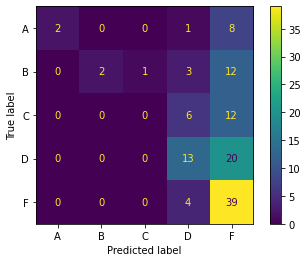

              precision    recall  f1-score   support

           A       0.73      0.20      0.31        40
           B       0.60      0.10      0.17        60
           C       0.29      0.03      0.06        62
           D       0.45      0.38      0.41       103
           F       0.42      0.90      0.57       130

    accuracy                           0.44       395
   macro avg       0.50      0.32      0.31       395
weighted avg       0.46      0.44      0.36       395



In [135]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
true_bin_class = []
true_5l_class = []
pred_bin_class = []
pred_5l_class = []

CMbinary_list = np.zeros((2,2)).astype(int)
CM5_level_list = np.zeros((5,5)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_binary_train, y_binary_test = y_binary[train_index], y_binary[test_index]
    y_5_level_train, y_5_level_test = y_5_level[train_index], y_5_level[test_index]

    svd.fit(X_train)

    X_train = svd.transform(X_train)
    X_test  = svd.transform(X_test)

    random_forest_bin = RandomForestClassifier()
    random_forest_5l  = RandomForestClassifier()

    random_forest_bin = random_forest_bin.fit(X_train, y_binary_train)
    random_forest_5l  = random_forest_5l.fit(X_train, y_5_level_train)

    y_binary_pred  = random_forest_bin.predict(X_test)
    y_5_level_pred = random_forest_5l.predict(X_test)

    true_bin_class.extend(y_binary_test)
    true_5l_class.extend(y_5_level_test)
    pred_bin_class.extend(y_binary_pred)
    pred_5l_class.extend(y_5_level_pred)

#binary 
CMbinary_list = confusion_matrix(true_bin_class, pred_bin_class) // 3
report = classification_report(true_bin_class, pred_bin_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=random_forest_bin.classes_).plot()
plt.show()
print(report)

#5 level 
CMbinary_list = confusion_matrix(true_5l_class, pred_5l_class) // 3
report = classification_report(true_5l_class, pred_5l_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=random_forest_5l.classes_).plot()
plt.show()
print(report)



# without PCA + Random Forest

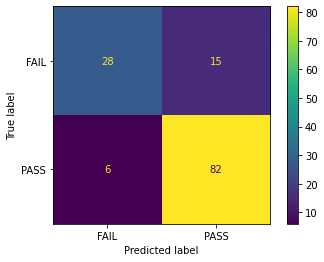

              precision    recall  f1-score   support

        FAIL       0.82      0.65      0.73       130
        PASS       0.85      0.93      0.88       265

    accuracy                           0.84       395
   macro avg       0.83      0.79      0.81       395
weighted avg       0.84      0.84      0.83       395



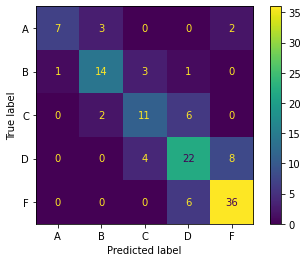

              precision    recall  f1-score   support

           A       0.85      0.55      0.67        40
           B       0.70      0.72      0.71        60
           C       0.59      0.53      0.56        62
           D       0.61      0.64      0.62       103
           F       0.77      0.85      0.81       130

    accuracy                           0.69       395
   macro avg       0.70      0.66      0.67       395
weighted avg       0.70      0.69      0.69       395



In [136]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
true_bin_class = []
true_5l_class = []
pred_bin_class = []
pred_5l_class = []

CMbinary_list = np.zeros((2,2)).astype(int)
CM5_level_list = np.zeros((5,5)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_binary_train, y_binary_test = y_binary[train_index], y_binary[test_index]
    y_5_level_train, y_5_level_test = y_5_level[train_index], y_5_level[test_index]

    random_forest_bin = RandomForestClassifier()
    random_forest_5l  = RandomForestClassifier()

    random_forest_bin = random_forest_bin.fit(X_train, y_binary_train)
    random_forest_5l  = random_forest_5l.fit(X_train, y_5_level_train)

    y_binary_pred  = random_forest_bin.predict(X_test)
    y_5_level_pred = random_forest_5l.predict(X_test)

    true_bin_class.extend(y_binary_test)
    true_5l_class.extend(y_5_level_test)
    pred_bin_class.extend(y_binary_pred)
    pred_5l_class.extend(y_5_level_pred)

#binary 
CMbinary_list = confusion_matrix(true_bin_class, pred_bin_class) // 3
report = classification_report(true_bin_class, pred_bin_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=random_forest_bin.classes_).plot()
plt.show()
print(report)

#5 level 
CMbinary_list = confusion_matrix(true_5l_class, pred_5l_class) // 3
report = classification_report(true_5l_class, pred_5l_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=random_forest_5l.classes_).plot()
plt.show()
print(report)



# PCA + KNN 

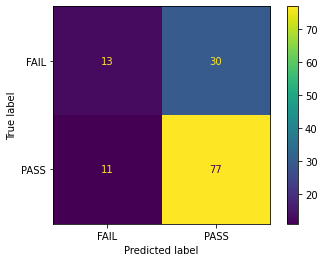

              precision    recall  f1-score   support

        FAIL       0.55      0.31      0.39       130
        PASS       0.72      0.88      0.79       265

    accuracy                           0.69       395
   macro avg       0.63      0.59      0.59       395
weighted avg       0.66      0.69      0.66       395



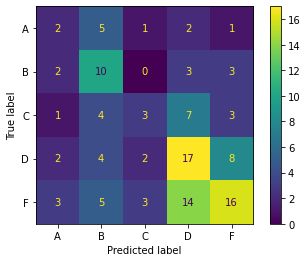

              precision    recall  f1-score   support

           A       0.22      0.20      0.21        40
           B       0.34      0.52      0.41        60
           C       0.32      0.18      0.23        62
           D       0.38      0.50      0.43       103
           F       0.51      0.38      0.44       130

    accuracy                           0.38       395
   macro avg       0.35      0.35      0.34       395
weighted avg       0.39      0.38      0.38       395



In [137]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
true_bin_class = []
true_5l_class = []
pred_bin_class = []
pred_5l_class = []

CMbinary_list = np.zeros((2,2)).astype(int)
CM5_level_list = np.zeros((5,5)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_binary_train, y_binary_test = y_binary[train_index], y_binary[test_index]
    y_5_level_train, y_5_level_test = y_5_level[train_index], y_5_level[test_index]

    svd.fit(X_train)

    X_train = svd.transform(X_train)
    X_test  = svd.transform(X_test)

    KNN_bin = KNeighborsClassifier(n_neighbors=5)
    KNN_5l  = KNeighborsClassifier(n_neighbors=5)

    KNN_bin = KNN_bin.fit(X_train, y_binary_train)
    KNN_5l  = KNN_5l.fit(X_train, y_5_level_train)

    y_binary_pred  = KNN_bin.predict(X_test)
    y_5_level_pred = KNN_5l.predict(X_test)

    true_bin_class.extend(y_binary_test)
    true_5l_class.extend(y_5_level_test)
    pred_bin_class.extend(y_binary_pred)
    pred_5l_class.extend(y_5_level_pred)

#binary 
CMbinary_list = confusion_matrix(true_bin_class, pred_bin_class) // 3
report = classification_report(true_bin_class, pred_bin_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=KNN_bin.classes_).plot()
plt.show()
print(report)

#5 level 
CMbinary_list = confusion_matrix(true_5l_class, pred_5l_class) // 3
report = classification_report(true_5l_class, pred_5l_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=KNN_5l.classes_).plot()
plt.show()
print(report)



# without PCA + KNN 

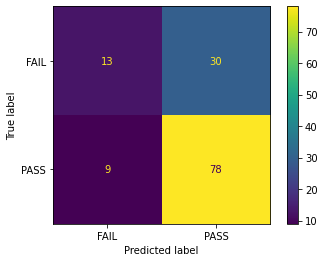

              precision    recall  f1-score   support

        FAIL       0.58      0.31      0.40       130
        PASS       0.72      0.89      0.80       265

    accuracy                           0.70       395
   macro avg       0.65      0.60      0.60       395
weighted avg       0.68      0.70      0.67       395



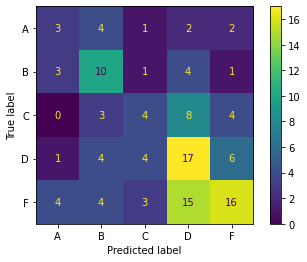

              precision    recall  f1-score   support

           A       0.26      0.23      0.24        40
           B       0.37      0.50      0.42        60
           C       0.33      0.23      0.27        62
           D       0.37      0.51      0.43       103
           F       0.53      0.38      0.44       130

    accuracy                           0.39       395
   macro avg       0.37      0.37      0.36       395
weighted avg       0.40      0.39      0.39       395



In [138]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
true_bin_class = []
true_5l_class = []
pred_bin_class = []
pred_5l_class = []

CMbinary_list = np.zeros((2,2)).astype(int)
CM5_level_list = np.zeros((5,5)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_binary_train, y_binary_test = y_binary[train_index], y_binary[test_index]
    y_5_level_train, y_5_level_test = y_5_level[train_index], y_5_level[test_index]

    KNN_bin = KNeighborsClassifier(n_neighbors=5)
    KNN_5l  = KNeighborsClassifier(n_neighbors=5)

    KNN_bin = KNN_bin.fit(X_train, y_binary_train)
    KNN_5l  = KNN_5l.fit(X_train, y_5_level_train)

    y_binary_pred  = KNN_bin.predict(X_test)
    y_5_level_pred = KNN_5l.predict(X_test)

    true_bin_class.extend(y_binary_test)
    true_5l_class.extend(y_5_level_test)
    pred_bin_class.extend(y_binary_pred)
    pred_5l_class.extend(y_5_level_pred)

#binary 
CMbinary_list = confusion_matrix(true_bin_class, pred_bin_class) // 3
report = classification_report(true_bin_class, pred_bin_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=KNN_bin.classes_).plot()
plt.show()
print(report)

#5 level 
CMbinary_list = confusion_matrix(true_5l_class, pred_5l_class) // 3
report = classification_report(true_5l_class, pred_5l_class)
ConfusionMatrixDisplay(confusion_matrix=CMbinary_list, display_labels=KNN_5l.classes_).plot()
plt.show()
print(report)



# Question


## Describe the difference between boosting and bagging.
    Bagging指的是訓練集當中隨機抽取多個小數量的資料去訓練多個複雜模型，在進行預測的時候，這些模型去進行投票(classification)或取平均(regression)
    Boosting則是使用多個弱分類器來進行合成，首先會先挑出一個最佳的分類器，並在剩下的弱分類器中找出與前面的分類器互補的，這樣的步驟會持續多次直到準確率足夠
    一般來說，bagging適合用在容易overfitting的模型，boosting適合用在underfitting的模型

## In 5-Level classification, reduce the data dimension to 2 using PCA and draw a scatter plot. You have to colorize the data points based on their labels.

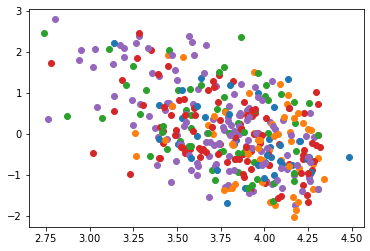

In [139]:
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=777)
svd.fit(x)
x_q4 = svd.transform(x)
for idx in range(len(x_q4)):
    if y_5_level[idx] == 'A':
        plt.scatter(x_q4[idx][0], x_q4[idx][1], c = '#1f77b4')
    elif y_5_level[idx] == 'B':
        plt.scatter(x_q4[idx][0], x_q4[idx][1], c = '#ff7f0e')
    elif y_5_level[idx] == 'C':
        plt.scatter(x_q4[idx][0], x_q4[idx][1], c = '#2ca02c')
    elif y_5_level[idx] == 'D':
        plt.scatter(x_q4[idx][0], x_q4[idx][1], c = '#d62728')
    else:
        plt.scatter(x_q4[idx][0], x_q4[idx][1], c = '#9467bd')
plt.show()